<a href="https://colab.research.google.com/github/Y-golabchi/Getting_Started/blob/main/EDZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorboard as tb
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score

In [2]:
edz=pd.read_csv('/content/EDZ.csv', header = 0)

In [3]:
edz

,SigMax/CI,r/a,Region
0,2.542783,1.184615,HDZ
1,2.789586,1.215385,HDZ
2,2.451743,1.153846,HDZ
3,2.468652,1.215385,HDZ
4,2.512763,1.215385,HDZ
...,...,...,...
1296,1.603217,1.538462,EDZo
1297,1.726974,1.615385,EDZo
1298,2.863636,2.030769,EDZo
1299,1.335651,1.338462,EDZo


In [4]:
edz.shape

(1301, 3)

In [5]:
edz.describe()

,SigMax/CI,r/a
count,1301.000000,1301.000000
mean,2.021162,1.375793
std,0.698898,0.260048
min,1.050000,1.007692
25%,1.500000,1.184615
50%,1.904014,1.338462
75%,2.451743,1.492308
max,5.580357,3.646154


In [6]:
change = LabelEncoder()
edz['Region'] = change.fit_transform(edz['Region'].astype('str'))

In [7]:
edz

,SigMax/CI,r/a,Region
0,2.542783,1.184615,2
1,2.789586,1.215385,2
2,2.451743,1.153846,2
3,2.468652,1.215385,2
4,2.512763,1.215385,2
...,...,...,...
1296,1.603217,1.538462,1
1297,1.726974,1.615385,1
1298,2.863636,2.030769,1
1299,1.335651,1.338462,1


In [8]:
list(change.inverse_transform([0, 1, 2]))

['EDZi', 'EDZo', 'HDZ']

In [9]:
edz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SigMax/CI  1301 non-null   float64
 1   r/a        1301 non-null   float64
 2   Region     1301 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 30.6 KB


In [10]:
edz.isnull().sum()

SigMax/CI    0
r/a          0
Region       0
dtype: int64

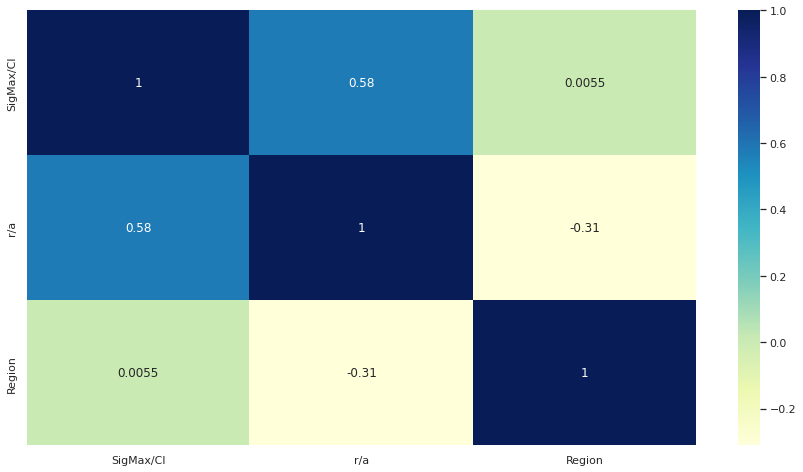

In [11]:
sns.set(rc = {'figure.figsize':(15,8)}) # enlarges the heatmap size
edz_corr = sns.heatmap(edz.corr(), cmap="YlGnBu", annot=True)

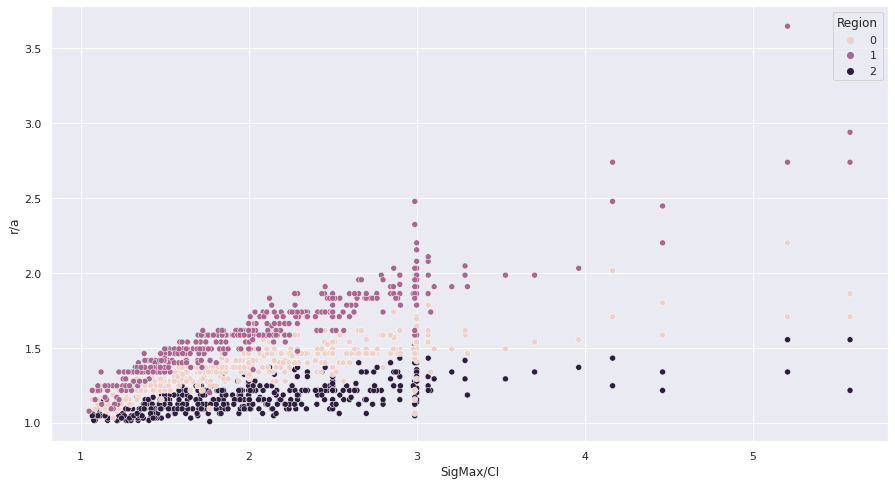

In [12]:
sns.scatterplot(x=edz['SigMax/CI'], y=edz['r/a'], data=edz, hue='Region')


# Three Different Algorithms will be used for this classification

1.   Logistic Regression
2.   Support Vector Machine (SVM)
3.   Artificial Neural Network (ANN)



## 1. Multi classification using Logistic Regression




In [13]:
inputs = edz.drop('Region', axis=1)
inputs.head()

,SigMax/CI,r/a
0,2.542783,1.184615
1,2.789586,1.215385
2,2.451743,1.153846
3,2.468652,1.215385
4,2.512763,1.215385


In [14]:
output = edz['Region']

In [15]:
output.head()

0    2
1    2
2    2
3    2
4    2
Name: Region, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split


In [17]:
x_train, x_test, y_train, y_test = train_test_split(inputs, output, test_size= 0.2, shuffle = True, random_state = 13) 

In [18]:
print (x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1040, 2) (261, 2) (1040,) (261,)


In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
model = LogisticRegression(multi_class='ovr')

In [21]:
model.fit(x_train, y_train)

LogisticRegression(multi_class='ovr')

In [22]:
model.score(x_test, y_test)

0.8275862068965517

In [23]:
model.predict_proba(x_test)

array([[3.70671473e-01, 1.47351613e-01, 4.81976914e-01],
       [2.75652314e-01, 7.18080368e-01, 6.26731793e-03],
       [3.51301671e-01, 9.46111491e-03, 6.39237214e-01],
       [3.05625356e-01, 1.28255226e-02, 6.81549121e-01],
       [5.52067173e-01, 3.21570100e-01, 1.26362727e-01],
       [3.37802382e-01, 5.65373236e-02, 6.05660295e-01],
       [4.40791779e-01, 7.17129048e-02, 4.87495316e-01],
       [4.11378564e-01, 9.94832817e-02, 4.89138154e-01],
       [3.24995606e-01, 6.02884781e-01, 7.21196128e-02],
       [2.64751765e-01, 7.28999814e-01, 6.24842120e-03],
       [4.54572073e-01, 3.07874419e-01, 2.37553509e-01],
       [4.38232318e-01, 1.14361451e-01, 4.47406231e-01],
       [3.50027569e-01, 9.04431034e-02, 5.59529327e-01],
       [3.76286544e-01, 4.12586200e-01, 2.11127255e-01],
       [4.07694688e-01, 2.63658250e-01, 3.28647062e-01],
       [3.36385524e-01, 5.91443929e-01, 7.21705464e-02],
       [5.63584954e-01, 1.44005312e-01, 2.92409734e-01],
       [4.02420467e-01, 4.56148

In [24]:
y_predicted = model.predict(x_test)

In [25]:
y_predicted_train = model.predict(x_train)

In [26]:
model.score(x_train, y_predicted_train)

1.0

In [27]:
y_predicted

array([2, 1, 2, 2, 0, 2, 2, 2, 1, 1, 0, 2, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1,
       1, 1, 2, 2, 0, 0, 2, 2, 0, 2, 1, 1, 2, 1, 1, 2, 0, 2, 0, 1, 2, 0,
       1, 1, 2, 2, 1, 2, 1, 2, 0, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 2, 2, 0,
       1, 2, 2, 1, 2, 1, 2, 0, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1,
       2, 1, 2, 1, 0, 2, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1,
       2, 0, 2, 1, 2, 0, 2, 2, 1, 2, 2, 0, 1, 1, 1, 2, 2, 2, 2, 0, 1, 1,
       2, 0, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 0, 0, 0, 0, 2, 1, 1, 2,
       2, 1, 1, 1, 2, 2, 0, 1, 0, 1, 2, 1, 1, 2, 0, 1, 2, 2, 0, 1, 2, 1,
       2, 2, 2, 0, 2, 2, 1, 1, 1, 1, 2, 2, 1, 0, 2, 1, 1, 1, 1, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 0, 0, 2, 1, 1, 2, 2, 0, 0, 0, 1, 1, 2, 1, 2, 2,
       1, 2, 1, 1, 2, 2, 0, 2, 0, 1, 0, 1, 2, 0, 1, 1, 0, 0, 2])

In [28]:
y_test

863     0
1133    1
226     2
326     2
1245    1
       ..
475     0
1270    1
762     0
550     0
570     0
Name: Region, Length: 261, dtype: int64

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
confusion = confusion_matrix (y_test, y_predicted)

Text(66.5, 0.5, 'Truth')

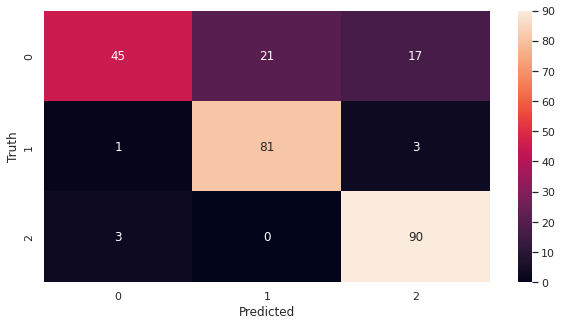

In [31]:
plt.figure (figsize = (10, 5))
sns.heatmap(confusion, annot = True )
plt.xlabel ('Predicted')
plt.ylabel ('Truth')

In [32]:
model.predict_proba(x_test)

array([[3.70671473e-01, 1.47351613e-01, 4.81976914e-01],
       [2.75652314e-01, 7.18080368e-01, 6.26731793e-03],
       [3.51301671e-01, 9.46111491e-03, 6.39237214e-01],
       [3.05625356e-01, 1.28255226e-02, 6.81549121e-01],
       [5.52067173e-01, 3.21570100e-01, 1.26362727e-01],
       [3.37802382e-01, 5.65373236e-02, 6.05660295e-01],
       [4.40791779e-01, 7.17129048e-02, 4.87495316e-01],
       [4.11378564e-01, 9.94832817e-02, 4.89138154e-01],
       [3.24995606e-01, 6.02884781e-01, 7.21196128e-02],
       [2.64751765e-01, 7.28999814e-01, 6.24842120e-03],
       [4.54572073e-01, 3.07874419e-01, 2.37553509e-01],
       [4.38232318e-01, 1.14361451e-01, 4.47406231e-01],
       [3.50027569e-01, 9.04431034e-02, 5.59529327e-01],
       [3.76286544e-01, 4.12586200e-01, 2.11127255e-01],
       [4.07694688e-01, 2.63658250e-01, 3.28647062e-01],
       [3.36385524e-01, 5.91443929e-01, 7.21705464e-02],
       [5.63584954e-01, 1.44005312e-01, 2.92409734e-01],
       [4.02420467e-01, 4.56148

In [33]:
model.predict(x_test)

array([2, 1, 2, 2, 0, 2, 2, 2, 1, 1, 0, 2, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1,
       1, 1, 2, 2, 0, 0, 2, 2, 0, 2, 1, 1, 2, 1, 1, 2, 0, 2, 0, 1, 2, 0,
       1, 1, 2, 2, 1, 2, 1, 2, 0, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 2, 2, 0,
       1, 2, 2, 1, 2, 1, 2, 0, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1,
       2, 1, 2, 1, 0, 2, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1,
       2, 0, 2, 1, 2, 0, 2, 2, 1, 2, 2, 0, 1, 1, 1, 2, 2, 2, 2, 0, 1, 1,
       2, 0, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 0, 0, 0, 0, 2, 1, 1, 2,
       2, 1, 1, 1, 2, 2, 0, 1, 0, 1, 2, 1, 1, 2, 0, 1, 2, 2, 0, 1, 2, 1,
       2, 2, 2, 0, 2, 2, 1, 1, 1, 1, 2, 2, 1, 0, 2, 1, 1, 1, 1, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 0, 0, 2, 1, 1, 2, 2, 0, 0, 0, 1, 1, 2, 1, 2, 2,
       1, 2, 1, 1, 2, 2, 0, 2, 0, 1, 0, 1, 2, 0, 1, 1, 0, 0, 2])

In [34]:
y_train

1156    1
393     2
879     1
565     0
1201    1
       ..
866     1
742     0
74      2
176     2
338     2
Name: Region, Length: 1040, dtype: int64

In [35]:
model.coef_

array([[ -0.01569368,  -0.3525302 ],
       [ -3.04386078,  11.56871879],
       [  1.8906287 , -12.00807858]])

In [36]:
model.intercept_

array([ -0.14981542, -11.0743131 ,  11.19986482])

In [37]:
from sklearn.metrics import precision_score, recall_score

In [38]:
precision_score(y_test, y_predicted, average='macro')

0.8435556040598057

In [39]:
sns.scatterplot?

# Polynomial Regression with Stats models

In [40]:
EDZi = edz[edz['Region']== 0]

In [41]:
EDZi

,SigMax/CI,r/a,Region
429,2.542783,1.584615,0
430,2.789586,1.584615,0
431,2.451743,1.538462,0
432,2.468652,1.523077,0
433,2.512763,1.538462,0
...,...,...,...
860,1.603217,1.369231,0
861,1.726974,1.492308,0
862,2.863636,1.738462,0
863,1.335651,1.153846,0


In [42]:
x_EDZi = np.array(EDZi ['SigMax/CI']).reshape(-1,1)

In [43]:
y_EDZi = np.array(EDZi['r/a']).reshape(-1,1)

In [44]:
EDZo = edz[edz['Region'] == 1]


In [45]:
x_EDZo = np.array(EDZo['SigMax/CI']).reshape(-1,1)

In [46]:
y_EDZo = np.array(EDZo['r/a']).reshape(-1,1)


In [47]:
HDZ = edz[edz['Region'] == 2]

In [48]:
x_HDZ = np.array(HDZ['SigMax/CI']).reshape(-1,1)


In [49]:
y_HDZ = np.array(HDZ['r/a']).reshape(-1,1)

(1.0, 2.0)

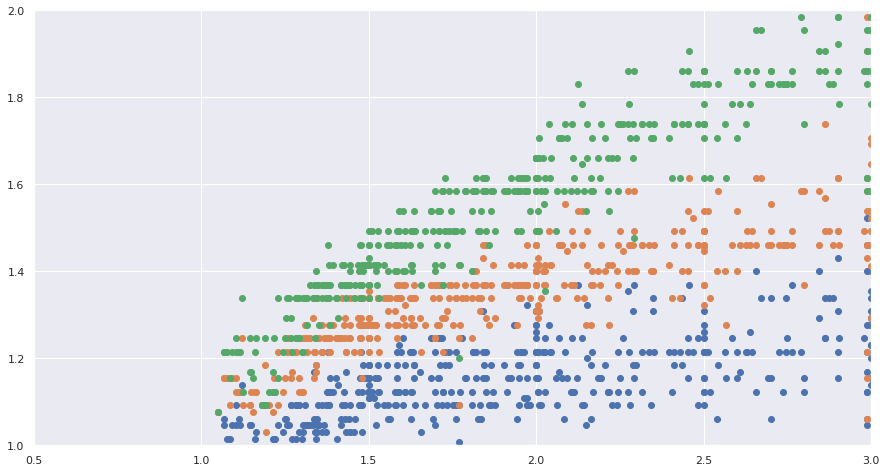

In [50]:
plt.scatter (x_HDZ, y_HDZ)
plt.scatter (x_EDZi, y_EDZi)
plt.scatter (x_EDZo, y_EDZo)
plt.xlim(.5,3)
plt.ylim(1,2)

In [51]:
from sklearn.preprocessing import PolynomialFeatures

In [52]:
poly = PolynomialFeatures(degree= 4)

In [53]:
print(y_HDZ.shape)
print(x_HDZ.shape)

(429, 1)
(429, 1)


In [54]:
xp_HDZ = poly.fit_transform(x_HDZ)
xp_HDZ.shape

(429, 5)

In [55]:
import statsmodels.api as sm

model_HDZ = sm.OLS(y_HDZ, xp_HDZ).fit()
ypred_HDZ = np.array(model_HDZ.predict(xp_HDZ)).reshape(-1,1) 

# print(ypred_HDZ.shape)
# print(xp_HDZ.shape)
# print(x_HDZ.shape)
# print(y_HDZ.shape)

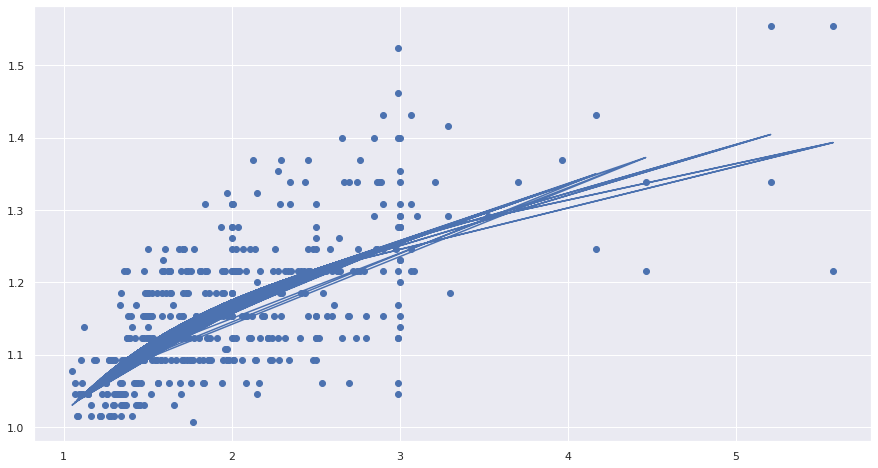

In [56]:
plt.scatter (x_HDZ, y_HDZ)
plt.plot(x_HDZ, ypred_HDZ)


In [57]:
model_HDZ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     93.08
Date:                Thu, 12 May 2022   Prob (F-statistic):           9.32e-57
Time:                        21:29:43   Log-Likelihood:                 525.86
No. Observations:                 429   AIC:                            -1042.
Df Residuals:                     424   BIC:                            -1021.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6177      0.158      3.914      0.000       0.308       0.928
x1             0.6016      0.256      2.351      0.019       0.099       1.105
x2            -0.2478      0.145     -1.705      0.089      -0.534       0.038
x3             0.0508      0.034      1.484      0.139      -0.017       0.118
x4            -0.0038      0.003     -1.356      0.176      -0.009       0.002
==============================================================================
Omnibus:                        8.891   Durbin-Watson:                   1.098
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                8.959
Skew:                           0.310   Prob(JB):                       0.0113
Kurtosis:                       3.343   Cond. No.                     9.67e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
xp_EDZi = poly.fit_transform(x_EDZi)
xp_EDZi.shape

(436, 5)

In [59]:
model_EDZi = sm.OLS(y_EDZi,xp_EDZi).fit()

In [60]:
ypred_EDZi = np.array(model_EDZi.predict(xp_EDZi)).reshape(-1,1) 

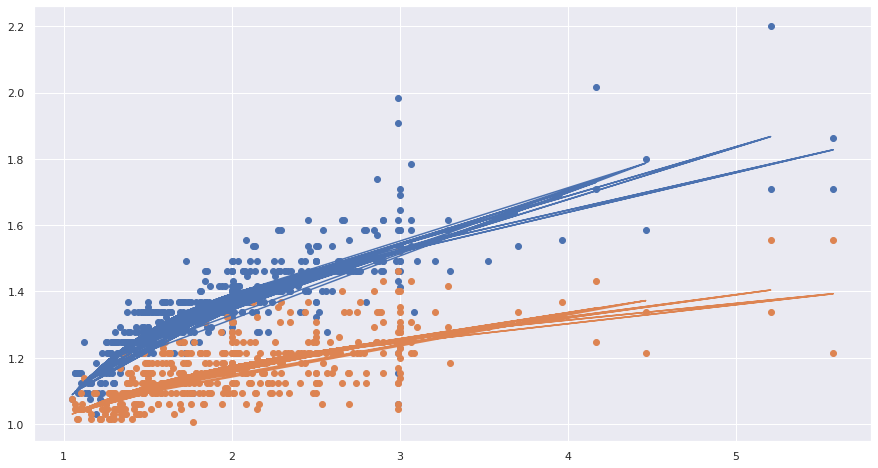

In [61]:
plt.scatter (x_EDZi, y_EDZi)
plt.plot(x_EDZi, ypred_EDZi)
plt.scatter (x_HDZ, y_HDZ)
plt.plot(x_HDZ, ypred_HDZ)

In [62]:
model_EDZi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     270.7
Date:                Thu, 12 May 2022   Prob (F-statistic):          4.13e-116
Time:                        21:29:44   Log-Likelihood:                 483.95
No. Observations:                 436   AIC:                            -957.9
Df Residuals:                     431   BIC:                            -937.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0225      0.173     -0.130      0.896      -0.362       0.317
x1             1.7142      0.282      6.088      0.000       1.161       2.268
x2            -0.7854      0.161     -4.890      0.000      -1.101      -0.470
x3             0.1659      0.038      4.369      0.000       0.091       0.241
x4            -0.0125      0.003     -3.990      0.000      -0.019      -0.006
==============================================================================
Omnibus:                       79.357   Durbin-Watson:                   1.130
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1162.645
Skew:                           0.166   Prob(JB):                    3.43e-253
Kurtosis:                      10.993   Cond. No.                     9.48e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
xp_EDZo = poly.fit_transform(x_EDZo)

In [64]:
model_EDZo = sm.OLS(y_EDZo, xp_EDZo).fit()

In [65]:
y_pred_EDZo = np.array(model_EDZo.predict(xp_EDZo)).reshape(-1,1)

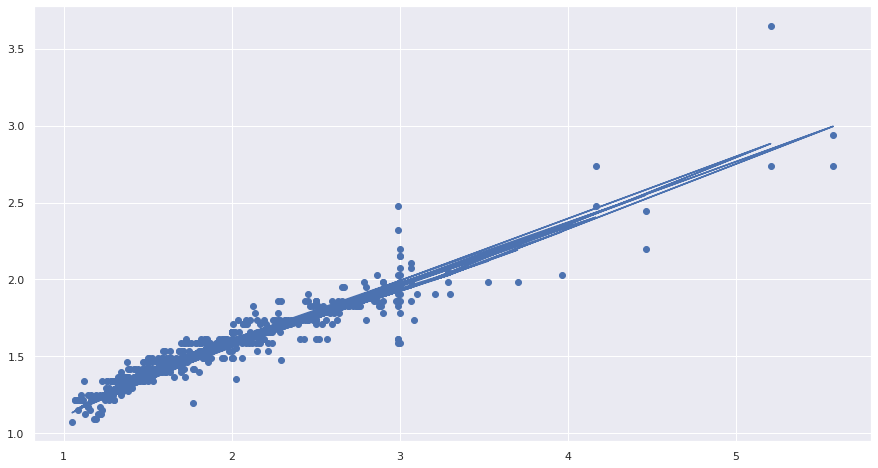

In [66]:
plt.scatter(x_EDZo, y_EDZo)
plt.plot(x_EDZo, y_pred_EDZo)


In [67]:
model_EDZo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     822.2
Date:                Thu, 12 May 2022   Prob (F-statistic):          3.67e-200
Time:                        21:29:46   Log-Likelihood:                 402.37
No. Observations:                 436   AIC:                            -794.7
Df Residuals:                     431   BIC:                            -774.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2072      0.208     -0.995      0.320      -0.616       0.202
x1             1.9682      0.340      5.797      0.000       1.301       2.636
x2            -0.8258      0.194     -4.264      0.000      -1.206      -0.445
x3             0.1731      0.046      3.780      0.000       0.083       0.263
x4            -0.0125      0.004     -3.324      0.001      -0.020      -0.005
==============================================================================
Omnibus:                      170.724   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3184.635
Skew:                           1.180   Prob(JB):                         0.00
Kurtosis:                      16.028   Cond. No.                     9.48e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(1.0, 2.5)

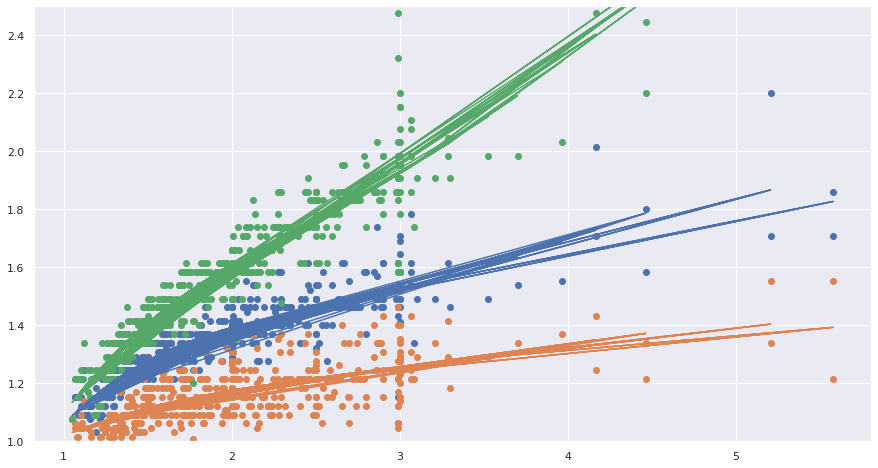

In [68]:
plt.scatter (x_EDZi, y_EDZi)
plt.plot(x_EDZi, ypred_EDZi)
plt.scatter (x_HDZ, y_HDZ)
plt.plot(x_HDZ, ypred_HDZ)
plt.scatter(x_EDZo, y_EDZo)
plt.plot(x_EDZo, y_pred_EDZo)
plt.ylim(1.0, 2.5)

# Polynomial regression using SK-Learn

In [69]:
from sklearn.linear_model import LinearRegression
Linear_Reg = LinearRegression()
poly.fit(xp_HDZ, y_HDZ)
Linear_Reg.fit(xp_HDZ, y_HDZ)

LinearRegression()

In [70]:
y_pred_HDZ_SK= Linear_Reg.predict(xp_HDZ)

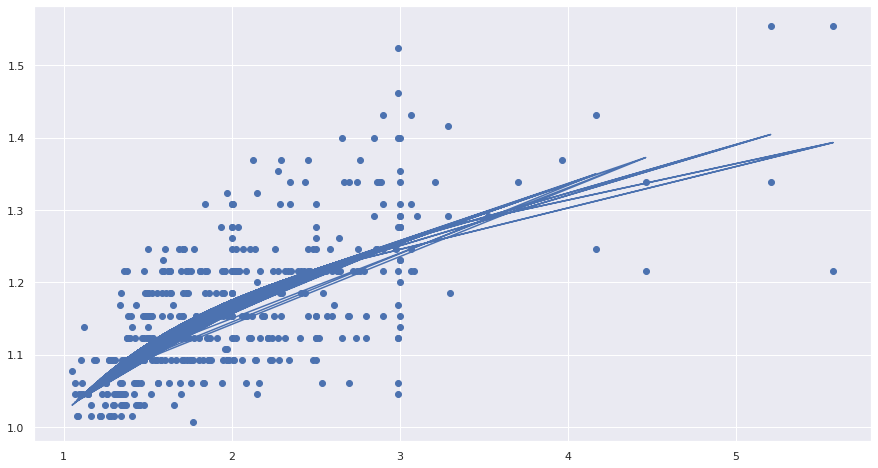

In [71]:
plt.scatter(x_HDZ, y_HDZ)
plt.plot(x_HDZ, y_pred_HDZ_SK)

# Plotting the Decision Boundary of Logistic Regression Model





In [72]:
xx, yy = np.mgrid[1:6:.01, 1:2.5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs1 = model.predict_proba(grid)[:, 1].reshape(xx.shape)
probs2 = model.predict_proba(grid)[:, 2].reshape(xx.shape)

In [73]:
# f, ax = plt.subplots(figsize=(8, 6))
# contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
#                       vmin=0, vmax=1)
# ax_c = f.colorbar(contour)
# ax_c.set_label("$P(y = 1)$")
# ax_c.set_ticks([0, .25, .5, .75, 1])

# ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
#            cmap="RdBu", vmin=-.2, vmax=1.2,
#            edgecolor="white", linewidth=1)

# ax.set(aspect="equal",
#        xlim=(-5, 5), ylim=(-5, 5),
#        xlabel="$X_1$", ylabel="$X_2$")
#cmap="bl", cmap="PuBuGn"

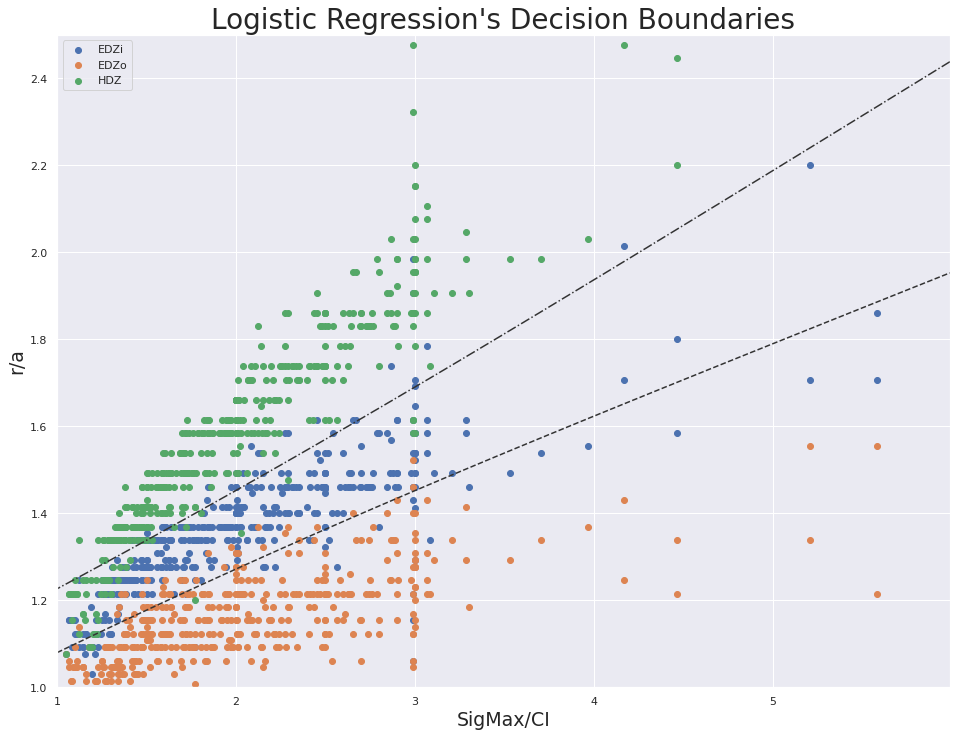

In [74]:
f, ax = plt.subplots(figsize=(16, 12))
line1 =ax.contour(xx, yy, probs1, levels=[.5], cmap="Greys", vmin=0, vmax=.6, linestyles='dashdot', label = 'Decision boundary of HDZ and EDZi')
line2 = ax.contour(xx, yy, probs2, levels=[.5], cmap="Greys",vmin=0, vmax=.6, linestyles='dashed', label = 'Decision boundary of EDZi and EDZo')
ax.scatter (x_EDZi, y_EDZi, label = 'EDZi')
ax.scatter (x_HDZ, y_HDZ, label = 'HDZ')
ax.scatter(x_EDZo, y_EDZo, label = 'EDZo')
plt.ylim(1.0, 2.5)
plt.xlabel('SigMax/CI', size = 19)
plt.ylabel('r/a', size =19)
plt.title('Logistic Regression\'s Decision Boundaries', size =28)
ax.legend(["EDZi", "EDZo", "HDZ", 'Decision boundary of HDZ and EDZi', 'Decision boundary of EDZi and EDZo'], loc = 'upper left')
plt.show()
# ax.legend([line1, line2], ['1', '2'])
# ax.legend(['Decision boundary of HDZ and EDZi', 'Decision boundary of EDZi and EDZo'] )

# ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
#            cmap="RdBu", vmin=-.2, vmax=1.2,
#            edgecolor="white", linewidth=1)

# ax.set(aspect="equal",
#        xlim=(-5, 5), ylim=(-5, 5),
#        xlabel="$X_1$", ylabel="$X_2$")

# Plotting Receiver Operating Characteristics (ROC) Curve








**ROC:  TPR vs FPR**

1.   TPR (Sensitivity)   = TP / TP+FN
2.   FPR (1-Specificity) = FP / TN+FP

## Prediction Probabilities

In [75]:
probs_ordinary =np.array([0 for x in range(len(y_test))]).reshape(-1,1)
logistic_probs = model.predict_proba(x_test)
logistic_probs.shape

(261, 3)

In [76]:
# (logistic_probs.reshape(-1,1)).shape

## Computing AUROC and ROC curve values

AUROC : Area under ROC curve

In [77]:
from sklearn.metrics import roc_curve, roc_auc_score

In [78]:
logistic_auc = roc_auc_score (y_test, logistic_probs, multi_class='ovr')
print('The logistic regression AUROC is: %.3f' %logistic_auc)

The logistic regression AUROC is: 0.956


In [79]:
# FPR, TPR = roc_curve(y_test, y_predicted)

#### Because we've done **multiclassification**, then it is not possible to calculate **TPR** or **FPR** so not possible to plot **ROC** curve

# Let's try binary classification using logistic regression between HDZ and EDZ (EDZi & EDZo combined) to plot ROC curve